# <b><font color='red'>Assignment 11</font> : Apply Decision Trees on Donors Choose Dataset</b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! pip install chart_studio

     |████████████████████████████████| 71kB 3.0MB/s 


## <b><font color='red'>Import Dependancies</font></b>

In [110]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from chart_studio.plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import seaborn as sea
from scipy.sparse import hstack
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

from prettytable import PrettyTable

## <b><font color='red'>>> Reading Dataset</font></b>

In [ ]:
Project_Dataframe = pd.read_csv('/content/drive/My Drive/Datasets/Apply Naive Bayes on Donor Choose Dataset/train_data.csv')
Resource_Dataframe = pd.read_csv('/content/drive/My Drive/Datasets/Apply Naive Bayes on Donor Choose Dataset/resources.csv')

In [ ]:
print('Number of Tain Data Points : ', Project_Dataframe.shape, '\n')
print('- -'*50, '\n')
print('Columns in Project Dataframe : \n\n', Project_Dataframe.columns.values, '\n')
print('- -'*50, '\n')
Project_Dataframe.head(5)

Number of Tain Data Points :  (109248, 17) 

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

Columns in Project Dataframe : 

 ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'] 

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 



Unnamed: 0  ... project_is_approved
0      160221  ...                   0
1      140945  ...                   1
2       21895  ...                   0
3          45  ...                   1
4      172407  ...                   1

[5 rows x 17 columns]

In [ ]:
print('Number of Tain Data Points : ', Resource_Dataframe.shape, '\n')
print('- -'*50, '\n')
print('Columns in Project Dataframe : \n\n', Resource_Dataframe.columns.values, '\n')
print('- -'*50, '\n')
Resource_Dataframe.head(5)

Number of Tain Data Points :  (1541272, 4) 

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 

Columns in Project Dataframe : 

 ['id' 'description' 'quantity' 'price'] 

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- - 



id                                        description  quantity   price
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1  149.00
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   14.95
2  p069063  Cory Stories: A Kid's Book About Living With Adhd         1    8.45
3  p069063  Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...         2   13.59
4  p069063  EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...         3   24.95

## <font color='blue'> >> Preprocessing of 'project_subject_categories' </font>

In [ ]:
# https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

Catogories = list(Project_Dataframe['project_subject_categories'].values)

cat_list = []
for i in Catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')  
    cat_list.append(temp.strip())
    
Project_Dataframe['clean_categories'] = cat_list
Project_Dataframe.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in Project_Dataframe['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

## <font color='blue'>>> Preprocessing of 'project_subject_subcategories' </font>

In [ ]:
# https://stackoverflow.com/a/47301924/4084039
# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_Catogories = list(Project_Dataframe['project_subject_subcategories'].values)

sub_cat_list = []
for i in sub_Catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','')
        j = j.replace(' ','')
        temp +=j.strip()+" "
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

Project_Dataframe['clean_subcategories'] = sub_cat_list
Project_Dataframe.drop(['project_subject_subcategories'], axis=1, inplace=True)

# https://stackoverflow.com/a/22898595/4084039

my_counter = Counter()
for word in Project_Dataframe['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## <font color='blue'>>> Text preprocessing</font>

In [ ]:
# Merge Two Column Text Dataframe: 

Project_Dataframe['essay'] = Project_Dataframe['project_essay_1'].map(str) +\
                        Project_Dataframe['project_essay_2'].map(str) + \
                        Project_Dataframe['project_essay_3'].map(str) + \
                        Project_Dataframe['project_essay_4'].map(str)

In [ ]:
# Print some Random Reviews

"""print(Project_Dataframe['essay'].values[0])
print("- -"*70)
print(Project_Dataframe['essay'].values[150])
print("- -"*70)
print(Project_Dataframe['essay'].values[1050])
print("- -"*70)"""
print(Project_Dataframe['essay'].values[20150])
print("- -"*70)
# print(Project_Dataframe['essay'].values[99999])
# print("- -"*70)

I teach at a Title 1 school where most of the students in my school receive free or reduced lunch. Most of these kids face many challenges at home so I want to make our class a safe and comfortable place where they are free to explore and learn.\r\nMy students are special because... because they are a part of my school family. They are avid readers, curious thinkers, and can't quite sit still for more than 5 minutes. I want them to grow and become better readers and thinkers because the world needs more of them.\r\nMy students will love having this in class. They already love to read all over the room whenever they have a chance to. I always tell my kids that they can read however they want to. They are not expected to stay in their desk.\r\nAs long as they are reading and enjoying their book, then it doesn't matter where they read. That's why I believe a comfy and soft carpet will benefit in my classroom. It will cover most of the cold, hard floor, and it will encourage more of my kid

In [ ]:
# https://stackoverflow.com/a/47091490/4084039

import re

def Decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [ ]:
sent = Decontracted(Project_Dataframe['essay'].values[20150])
print(sent)
print("- -"*70)

I teach at a Title 1 school where most of the students in my school receive free or reduced lunch. Most of these kids face many challenges at home so I want to make our class a safe and comfortable place where they are free to explore and learn.\r\nMy students are special because... because they are a part of my school family. They are avid readers, curious thinkers, and can not quite sit still for more than 5 minutes. I want them to grow and become better readers and thinkers because the world needs more of them.\r\nMy students will love having this in class. They already love to read all over the room whenever they have a chance to. I always tell my kids that they can read however they want to. They are not expected to stay in their desk.\r\nAs long as they are reading and enjoying their book, then it does not matter where they read. That is why I believe a comfy and soft carpet will benefit in my classroom. It will cover most of the cold, hard floor, and it will encourage more of my

In [ ]:
# Remove (\r \n \t) from String in Python: http://texthandler.com/info/remove-line-breaks-python/

sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I teach at a Title 1 school where most of the students in my school receive free or reduced lunch. Most of these kids face many challenges at home so I want to make our class a safe and comfortable place where they are free to explore and learn.  My students are special because... because they are a part of my school family. They are avid readers, curious thinkers, and can not quite sit still for more than 5 minutes. I want them to grow and become better readers and thinkers because the world needs more of them.  My students will love having this in class. They already love to read all over the room whenever they have a chance to. I always tell my kids that they can read however they want to. They are not expected to stay in their desk.  As long as they are reading and enjoying their book, then it does not matter where they read. That is why I believe a comfy and soft carpet will benefit in my classroom. It will cover most of the cold, hard floor, and it will encourage more of my kids 

In [ ]:
# Removing Spacial Character: https://stackoverflow.com/a/5843547/4084039

sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I teach at a Title 1 school where most of the students in my school receive free or reduced lunch Most of these kids face many challenges at home so I want to make our class a safe and comfortable place where they are free to explore and learn My students are special because because they are a part of my school family They are avid readers curious thinkers and can not quite sit still for more than 5 minutes I want them to grow and become better readers and thinkers because the world needs more of them My students will love having this in class They already love to read all over the room whenever they have a chance to I always tell my kids that they can read however they want to They are not expected to stay in their desk As long as they are reading and enjoying their book then it does not matter where they read That is why I believe a comfy and soft carpet will benefit in my classroom It will cover most of the cold hard floor and it will encourage more of my kids to lay down and read w

In [ ]:
# https://gist.github.com/sebleier/554280

stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
# https://gist.github.com/sebleier/554280

preprocessed_essays = []
for sentance in tqdm(Project_Dataframe['essay'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:58<00:00, 1882.57it/s]


In [ ]:
preprocessed_essays[20150]

'i teach title 1 school students school receive free reduced lunch most kids face many challenges home i want make class safe comfortable place free explore learn my students special part school family they avid readers curious thinkers not quite sit still 5 minutes i want grow become better readers thinkers world needs my students love class they already love read room whenever chance i always tell kids read however want they not expected stay desk as long reading enjoying book not matter read that i believe comfy soft carpet benefit classroom it cover cold hard floor encourage kids lay read chapter books nannan'

## <font color='blue'> >> Preprocessing of 'project_title'</font>

In [ ]:
# Print Some Random essay titles.

"""print(Project_Dataframe['project_title'].values[0])
print("- -"*20)
print(Project_Dataframe['project_title'].values[250])
print("- -"*20)
print(Project_Dataframe['project_title'].values[25010])
print("- -"*20)"""
print(Project_Dataframe['project_title'].values[50055])
print("- -"*20)
# print(Project_Dataframe['project_title'].values[99999])
# print("- -"*20)

Sprucing Up Our Classroom Environment!
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -


In [ ]:
# https://gist.github.com/sebleier/554280

preprocessed_essays = []
for sentance in tqdm(Project_Dataframe['project_title'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [00:02<00:00, 43145.79it/s]


In [ ]:
new_title = []
for i in tqdm(Project_Dataframe['project_title']):
    j = Decontracted(i)
    new_title.append(j)  

100%|██████████| 109248/109248 [00:00<00:00, 120768.59it/s]


In [ ]:
title_word_count = []
for i in tqdm(new_title):
    j = len(i.split())
    title_word_count.append(j)
Project_Dataframe['title_word_count'] = title_word_count

100%|██████████| 109248/109248 [00:00<00:00, 1050181.34it/s]


In [ ]:
new_essay = []
for i in tqdm(Project_Dataframe['essay']):
    j = Decontracted(i)
    new_essay.append(j)  

100%|██████████| 109248/109248 [00:01<00:00, 55047.32it/s]


In [ ]:
essay_word_count = []
for i in tqdm(new_essay):
    j = len(i.split())
    essay_word_count.append(j)
Project_Dataframe['essay_word_count'] = essay_word_count

100%|██████████| 109248/109248 [00:01<00:00, 64249.48it/s]


In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end = '')

neg: 0.109, neu: 0.693, pos: 0.198, compound: 0.2023, 

In [ ]:
# http://www.nltk.org/howto/sentiment.html

SID = SentimentIntensityAnalyzer()

negitive = []
positive = []
neutral = []
compound = []
for i in tqdm(Project_Dataframe['essay']):
    j = SID.polarity_scores(i)['neg']
    k = SID.polarity_scores(i)['neu']
    l = SID.polarity_scores(i)['pos']
    m = SID.polarity_scores(i)['compound']
    negitive.append(j)
    positive.append(k)
    neutral.append(l)
    compound.append(m)

100%|██████████| 109248/109248 [19:44<00:00, 92.21it/s]


In [ ]:
Project_Dataframe['negitive'] = negitive
Project_Dataframe['positive'] = positive
Project_Dataframe['neutral'] = neutral
Project_Dataframe['compound'] = compound

## <font color='blue'>>> Preparing data for models</font>

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

x_train, X_test, y_train, y_test = train_test_split(Project_Dataframe, Project_Dataframe['project_is_approved'],test_size = 0.33,
                                                    stratify = Project_Dataframe['project_is_approved'], random_state = 42)

X_train, X_cv, y_train, y_cv = train_test_split(x_train, y_train, test_size = 0.33, stratify = y_train, random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

(49041, 24) (49041,)
(36052, 24) (36052,)
(24155, 24) (24155,)


In [ ]:
print(x_train.columns)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'title_word_count',
       'essay_word_count', 'negitive', 'positive', 'neutral', 'compound'],
      dtype='object')


In [ ]:
X_train.drop(["project_is_approved"], axis = 1, inplace = True)
X_test.drop(["project_is_approved"], axis = 1, inplace = True)
X_cv.drop(["project_is_approved"], axis = 1, inplace = True)

In [ ]:
# https://gist.github.com/sebleier/554280aq`

preprocessed_essay_train_data = []

for sentance in tqdm(X_train['essay'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    preprocessed_essay_train_data.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:07<00:00, 6505.47it/s]


In [ ]:
# https://gist.github.com/sebleier/554280

preprocessed_essay_test_data = []

for sentance in tqdm(X_test['essay'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    preprocessed_essay_test_data.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:05<00:00, 6511.08it/s]


In [ ]:
# https://gist.github.com/sebleier/554280

preprocessed_essay_cv_data = []

for sentance in tqdm(X_cv['essay'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    preprocessed_essay_cv_data.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:03<00:00, 6430.21it/s]


In [ ]:
# https://gist.github.com/sebleier/554280

train_preprocessed_project_title = []

for sentance in tqdm(X_train['project_title'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    train_preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 49041/49041 [00:00<00:00, 71659.70it/s]


In [ ]:
# https://gist.github.com/sebleier/554280

cv_preprocessed_project_title = []

for sentance in tqdm(X_cv['project_title'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    cv_preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 24155/24155 [00:00<00:00, 71556.20it/s]


In [ ]:
# https://gist.github.com/sebleier/554280

test_preprocessed_project_title = []

for sentance in tqdm(X_test['project_title'].values):
    sent = Decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e for e in sent.split() if e not in stop_words)
    test_preprocessed_project_title.append(sent.lower().strip())

100%|██████████| 36052/36052 [00:00<00:00, 72178.86it/s]


### <font color='blue'>>> Vectorizing Categorical data (https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/)</font>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect_categories = CountVectorizer(vocabulary = list(sorted_cat_dict.keys()), lowercase = False, binary = True)
vect_categories.fit(Project_Dataframe['clean_categories'].values)

train_categories_one_hot = vect_categories.transform(X_train['clean_categories'].values)
cv_categories_one_hot = vect_categories.transform(X_cv['clean_categories'].values)
test_categories_one_hot = vect_categories.transform(X_test['clean_categories'].values)

print(vect_categories.get_feature_names())
print("Shape of train matrix after one hot encodig : ", train_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", cv_categories_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", test_categories_one_hot.shape)
cat_feature = vect_categories.get_feature_names()

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of train matrix after one hot encodig :  (49041, 9)
Shape of train matrix after one hot encodig :  (24155, 9)
Shape of train matrix after one hot encodig :  (36052, 9)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_subcategories = CountVectorizer(vocabulary = list(sorted_sub_cat_dict.keys()), lowercase = False, binary = True)
vectorizer_subcategories.fit(Project_Dataframe['clean_subcategories'].values)

train_subcategories_one_hot = vectorizer_subcategories.transform(X_train['clean_subcategories'].values)
cv_subcategories_one_hot = vectorizer_subcategories.transform(X_cv['clean_subcategories'].values)
test_subcategories_one_hot = vectorizer_subcategories.transform(X_test['clean_subcategories'].values)

print(vectorizer_subcategories.get_feature_names())
print("Shape of train matrix after one hot encodig : ", train_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", cv_subcategories_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", test_subcategories_one_hot.shape)
subcat_feature = vectorizer_subcategories.get_feature_names()

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of train matrix after one hot encodig :  (49041, 30)
Shape of train matrix after one hot encodig :  (24155, 30)
Shape of train matrix after one hot encodig :  (36052, 30)


In [ ]:
# https://stackoverflow.com/a/22898595/4084039
# https://stackoverflow.com/a/613218/4084039

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

my_counter = Counter()
for word in Project_Dataframe['school_state'].values:
    my_counter.update(word.split())

cat_dict_state = dict(my_counter)
sorted_cat_dict_state = dict(sorted(cat_dict_state.items(), key = lambda kv: kv[1]))

vectorizer_state = CountVectorizer(vocabulary = list(sorted_cat_dict_state.keys()), lowercase = False, binary = True)
vectorizer_state.fit(Project_Dataframe['school_state'].values)

train_state_one_hot = vectorizer_state.transform(X_train['school_state'].values)
cv_state_one_hot = vectorizer_state.transform(X_cv['school_state'].values)
test_state_one_hot = vectorizer_state.transform(X_test['school_state'].values)

print(vectorizer_state.get_feature_names())
print("Shape of train matrix after one hot encodig : ", train_state_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", cv_state_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", test_state_one_hot.shape)
state_feature = vectorizer_state.get_feature_names()

['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of train matrix after one hot encodig :  (49041, 51)
Shape of train matrix after one hot encodig :  (24155, 51)
Shape of train matrix after one hot encodig :  (36052, 51)


In [ ]:
Project_Dataframe.project_grade_category = Project_Dataframe.project_grade_category.str.replace('\s+', '_')
Project_Dataframe.project_grade_category = Project_Dataframe.project_grade_category.str.replace('-', '_')
Project_Dataframe['project_grade_category'].value_counts()

Grades_PreK_2    44225
Grades_3_5       37137
Grades_6_8       16923
Grades_9_12      10963
Name: project_grade_category, dtype: int64

In [ ]:
# https://stackoverflow.com/a/22898595/4084039
# https://stackoverflow.com/a/613218/4084039

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

my_counter = Counter()
for word in Project_Dataframe['project_grade_category']:
    my_counter.update(word.split())
    
cat_dict_grade = dict(my_counter)
sorted_cat_dict_grade = dict(sorted(cat_dict_grade.items(), key = lambda kv: kv[1]))
print(sorted_cat_dict_grade)

vectorizer_grade_cat = CountVectorizer(vocabulary = list(sorted_cat_dict_grade.keys()), lowercase = False, binary = True)
vectorizer_grade_cat.fit(Project_Dataframe['project_grade_category'].values)

train_grade_one_hot = vectorizer_grade_cat.transform(X_train['project_grade_category'].values)
cv_grade_one_hot = vectorizer_grade_cat.transform(X_cv['project_grade_category'].values)
test_grade_one_hot = vectorizer_grade_cat.transform(X_test['project_grade_category'].values)

print(vectorizer_grade_cat.get_feature_names())
print("Shape of train matrix after one hot encodig : ", train_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", cv_grade_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", test_grade_one_hot.shape)
grade_feature=vectorizer_grade_cat.get_feature_names()

{'Grades_9_12': 10963, 'Grades_6_8': 16923, 'Grades_3_5': 37137, 'Grades_PreK_2': 44225}
['Grades_9_12', 'Grades_6_8', 'Grades_3_5', 'Grades_PreK_2']
Shape of train matrix after one hot encodig :  (49041, 4)
Shape of train matrix after one hot encodig :  (24155, 4)
Shape of train matrix after one hot encodig :  (36052, 4)


In [ ]:
# https://stackoverflow.com/questions/42224700/attributeerror-float-object-has-no-attribute-split

Project_Dataframe['teacher_prefix'] = Project_Dataframe['teacher_prefix'].fillna("")

In [ ]:
# https://stackoverflow.com/a/22898595/4084039
# https://stackoverflow.com/a/613218/4084039

from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

my_counter = Counter()
for word in Project_Dataframe['teacher_prefix']:
    my_counter.update(word.split())


cat_dict_prefix = dict(my_counter)
sorted_cat_dict_prefix = dict(sorted(cat_dict_prefix.items(), key = lambda kv: kv[1]))

vectorizer_teacher_prefix = CountVectorizer(vocabulary=list(sorted_cat_dict_prefix.keys()), lowercase = False, binary = True)
vectorizer_teacher_prefix.fit(Project_Dataframe['teacher_prefix'].values.astype('U'))

train_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_train['teacher_prefix'].values.astype('U'))
cv_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_cv['teacher_prefix'].values.astype('U'))
test_teacher_prefix_one_hot = vectorizer_teacher_prefix.transform(X_test['teacher_prefix'].values.astype('U'))

print(vectorizer_teacher_prefix.get_feature_names())
print("Shape of train matrix after one hot encodig : ", train_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", cv_teacher_prefix_one_hot.shape)
print("Shape of train matrix after one hot encodig : ", test_teacher_prefix_one_hot.shape)
teacher_feature = vectorizer_teacher_prefix.get_feature_names()

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of train matrix after one hot encodig :  (49041, 5)
Shape of train matrix after one hot encodig :  (24155, 5)
Shape of train matrix after one hot encodig :  (36052, 5)


### <font color='blue'>>> Vectorizing Text data</font>

### <font color='blue'>>> TFIDF vectorizer</font>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 10)
vectorizer.fit(train_preprocessed_project_title)

text_tfidf_title_train = vectorizer.transform(train_preprocessed_project_title)
print("Shape of matrix after one hot encodig ",text_tfidf_title_train.shape)

Shape of matrix after one hot encodig  (49041, 2080)


In [ ]:
text_tfidf_title_cv = vectorizer.transform(cv_preprocessed_project_title)
print("Shape of matrix after one hot encodig : ", text_tfidf_title_cv.shape)

Shape of matrix after one hot encodig :  (24155, 2080)


In [ ]:
text_tfidf_title_test = vectorizer.transform(test_preprocessed_project_title)
print("Shape of matrix after one hot encodig : ", text_tfidf_title_test.shape)
title_tfidf_feature = vectorizer.get_feature_names()

Shape of matrix after one hot encodig :  (36052, 2080)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 10)
vectorizer.fit(preprocessed_essay_train_data)

tfidf_essay_train = vectorizer.transform(preprocessed_essay_train_data)
print("Shape of matrix after one hot encodig : ",tfidf_essay_train.shape)

Shape of matrix after one hot encodig :  (49041, 12131)


In [ ]:
tfidf_essay_cv = vectorizer.transform(preprocessed_essay_cv_data)
print("Shape of matrix after one hot encodig : ",tfidf_essay_cv.shape)

Shape of matrix after one hot encodig :  (24155, 12131)


In [ ]:
tfidf_essay_test = vectorizer.transform(preprocessed_essay_test_data)
print("Shape of matrix after one hot encodig : ",tfidf_essay_test.shape)
tfidf_essay_feature = vectorizer.get_feature_names()

Shape of matrix after one hot encodig :  (36052, 12131)


### <font color='blue'>>> AVG W2V vectorizer</font>

In [ ]:
# http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

with open('/content/drive/My Drive/Datasets/Apply Naive Bayes on Donor Choose Dataset/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
avg_w2v_essay_train_data = [];
for sentence in tqdm(preprocessed_essay_train_data):
    vector = np.zeros(300)
    cnt_words = 0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_train_data.append(vector)

100%|██████████| 49041/49041 [00:15<00:00, 3092.55it/s]


In [ ]:
avg_w2v_essay_cv_data = [];
for sentence in tqdm(preprocessed_essay_cv_data):
    vector = np.zeros(300)
    cnt_words = 0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_cv_data.append(vector)

100%|██████████| 24155/24155 [00:07<00:00, 3084.01it/s]


In [ ]:
avg_w2v_essay_test_data = [];
for sentence in tqdm(preprocessed_essay_test_data):
    vector = np.zeros(300)
    cnt_words = 0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_essay_test_data.append(vector)

100%|██████████| 36052/36052 [00:11<00:00, 3037.34it/s]


In [ ]:
avg_w2v_project_title_train_data = [];
for sentence in tqdm(train_preprocessed_project_title):
    vector = np.zeros(300)
    cnt_words = 0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_train_data.append(vector)

100%|██████████| 49041/49041 [00:00<00:00, 58557.21it/s]


In [ ]:
avg_w2v_project_title_cv_data = [];
for sentence in tqdm(cv_preprocessed_project_title):
    vector = np.zeros(300)
    cnt_words = 0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_cv_data.append(vector)

100%|██████████| 24155/24155 [00:00<00:00, 58066.68it/s]


In [ ]:
avg_w2v_project_title_test_data = [];
for sentence in tqdm(test_preprocessed_project_title):
    vector = np.zeros(300)
    cnt_words =0;
    for word in sentence.split():
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_project_title_test_data.append(vector)

100%|██████████| 36052/36052 [00:00<00:00, 59761.13it/s]


### <font color='blue'>>> TFIDF weighted W2V </font>

In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essay_train_data)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
tfidf_w2v_essay_train_data = [];
for sentence in tqdm(preprocessed_essay_train_data):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train_data.append(vector)

print(len(tfidf_w2v_essay_train_data))
print(len(tfidf_w2v_essay_train_data[0]))

100%|██████████| 49041/49041 [01:37<00:00, 505.10it/s]

49041
300


In [ ]:
tfidf_w2v_essay_cv_data = [];
for sentence in tqdm(preprocessed_essay_cv_data):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_cv_data.append(vector)

100%|██████████| 24155/24155 [00:47<00:00, 510.12it/s]


In [ ]:
tfidf_w2v_essay_test_data = [];
for sentence in tqdm(preprocessed_essay_test_data):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test_data.append(vector)

100%|██████████| 36052/36052 [01:11<00:00, 504.67it/s]


In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(train_preprocessed_project_title)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:
tfidf_w2v_project_title_train_data = [];
for sentence in tqdm(train_preprocessed_project_title):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_train_data.append(vector)

100%|██████████| 49041/49041 [00:02<00:00, 20314.69it/s]


In [ ]:
tfidf_w2v_project_title_cv_data = [];
for sentence in tqdm(cv_preprocessed_project_title):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_cv_data.append(vector)

100%|██████████| 24155/24155 [00:01<00:00, 18128.48it/s]


In [ ]:
tfidf_w2v_project_title_test_data = [];
for sentence in tqdm(test_preprocessed_project_title):
    vector = np.zeros(300)
    tf_idf_weight = 0;
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += (vec * tf_idf)
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_project_title_test_data.append(vector)

100%|██████████| 36052/36052 [00:01<00:00, 19750.83it/s]


In [ ]:
Price_data = Resource_Dataframe.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
Project_Dataframe = pd.merge(Project_Dataframe, Price_data, on = 'id', how = 'left')

In [ ]:
Project_Dataframe.head(2)

Unnamed: 0       id  ...  price quantity
0      160221  p253737  ...  154.6       23
1      140945  p258326  ...  299.0        1

[2 rows x 26 columns]

In [ ]:
X_train = pd.merge(X_train, Price_data, on = "id", how = "left")
X_test = pd.merge(X_test, Price_data, on = "id", how = "left")
X_cv = pd.merge(X_cv, Price_data, on = "id", how = "left")

### <font color='blue'>>> Standardize Price </font>

In [ ]:
# https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler

Price_scalar = StandardScaler()

Price_scalar.fit(X_train['price'].values.reshape(-1, 1))
train_price_standard = Price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Price_scalar.fit(X_test['price'].values.reshape(-1, 1))
test_price_standard = Price_scalar.transform(X_test['price'].values.reshape(-1, 1))

Price_scalar.fit(X_cv['price'].values.reshape(-1, 1))
cv_price_standard = Price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

### <font color='blue'>>> Preprocessing 'teacher_number_of_previously_posted_projects' </font>

In [ ]:
Price_scalar.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
train_prev_proj_standard = Price_scalar.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Price_scalar.fit(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
test_prev_proj_standard = Price_scalar.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

Price_scalar.fit(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
cv_prev_proj_standard = Price_scalar.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

### <font color='blue'>>> Standardize 'quantity' </font>

In [ ]:
Price_scalar.fit(X_train['quantity'].values.reshape(-1, 1))
train_quantity_standard = Price_scalar.transform(X_train['quantity'].values.reshape(-1, 1))

Price_scalar.fit(X_test['quantity'].values.reshape(-1, 1))
test_quantity_standard = Price_scalar.transform(X_test['quantity'].values.reshape(-1, 1))

Price_scalar.fit(X_cv['quantity'].values.reshape(-1, 1))
cv_quantity_standard = Price_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

In [ ]:
title_scalar = StandardScaler()

title_scalar.fit(X_train['title_word_count'].values.reshape(-1, 1))
train_title_word_count_standard = title_scalar.transform(X_train['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(X_test['title_word_count'].values.reshape(-1, 1))
test_title_word_count_standard = title_scalar.transform(X_test['title_word_count'].values.reshape(-1, 1))

title_scalar.fit(X_cv['title_word_count'].values.reshape(-1, 1))
cv_title_word_count_standard = title_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))

In [ ]:
essay_scalar = StandardScaler()

essay_scalar.fit(X_train['essay_word_count'].values.reshape(-1, 1))
train_essay_word_count_standard = essay_scalar.transform(X_train['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(X_train['essay_word_count'].values.reshape(-1, 1))
test_essay_word_count_standard = essay_scalar.transform(X_test['essay_word_count'].values.reshape(-1, 1))

essay_scalar.fit(X_cv['essay_word_count'].values.reshape(-1, 1))
cv_essay_word_count_standard = essay_scalar.transform(X_cv['essay_word_count'].values.reshape(-1, 1))

In [ ]:
essay_scalar.fit(X_train['positive'].values.reshape(-1, 1))
train_positive_standard = essay_scalar.transform(X_train['positive'].values.reshape(-1, 1))

essay_scalar.fit(X_train['positive'].values.reshape(-1, 1))
test_positive_standard = essay_scalar.transform(X_test['positive'].values.reshape(-1, 1))

essay_scalar.fit(X_cv['positive'].values.reshape(-1, 1))
cv_positive_standard = essay_scalar.transform(X_cv['positive'].values.reshape(-1, 1))

In [ ]:
essay_scalar.fit(X_train['negitive'].values.reshape(-1, 1))
train_negitive_standard = essay_scalar.transform(X_train['negitive'].values.reshape(-1, 1))

essay_scalar.fit(X_train['negitive'].values.reshape(-1, 1))
test_negitive_standard = essay_scalar.transform(X_test['negitive'].values.reshape(-1, 1))

essay_scalar.fit(X_cv['negitive'].values.reshape(-1, 1))
cv_negitive_standard = essay_scalar.transform(X_cv['negitive'].values.reshape(-1, 1))

In [ ]:
essay_scalar.fit(X_train['neutral'].values.reshape(-1, 1))
train_neutral_standard = essay_scalar.transform(X_train['neutral'].values.reshape(-1, 1))

essay_scalar.fit(X_train['neutral'].values.reshape(-1, 1))
test_neutral_standard = essay_scalar.transform(X_test['neutral'].values.reshape(-1, 1))

essay_scalar.fit(X_cv['neutral'].values.reshape(-1, 1))
cv_neutral_standard = essay_scalar.transform(X_cv['neutral'].values.reshape(-1, 1))

<font color='red'><b> TF-IDFW2V</b></font>

<b>Tfidf w2v (w1,w2..) = (tfidf(w1) * w2v(w1) + tfidf(w2) * w2v(w2) + …)  /    (tfidf(w1) + tfidf(w2) + …)</b>

<b>(Optional) Please check course video on [AVgw2V and TF-IDFW2V ](https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2916/avg-word2vec-tf-idf-weighted-word2vec/3/module-3-foundations-of-natural-language-processing-and-machine-learning)for more details.

<font color='blue'><b>Glove vectors </b></font>

<b>In this assignment you will be working with glove vectors , please check  [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) and [this](https://en.wikipedia.org/wiki/GloVe_(machine_learning)) for more details.</b><br>

Download glove vectors from this [link ](https://drive.google.com/file/d/1lDca_ge-GYO0iQ6_XDLWePQFMdAA2b8f/view?usp=sharing)

# <font color='red'> <b>Task - 1</b></font>

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features +  preprocessed_essay (TFIDF) + Sentiment scores(preprocessed_essay)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features +  preprocessed_essay (TFIDF W2V) + Sentiment scores(preprocessed_essay)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use gridsearch cv or randomsearch cv)/simple cross validation data(you can write your own for loops refer sample solution)</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud(https://www.geeksforgeeks.org/generating-word-cloud-python/) with the words of essay text of these `false positive data points`</li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
   

For this task consider **set-1** features.

*  Select all the features which are having non-zero feature importance.You can get the feature importance using  'feature_importances_` 
   (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), discard the all other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM).
*  You need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3<br>
  **Note**: when you want to find the feature importance make sure you don't use max_depth parameter keep it None.
  </li>
    <br>
You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# <b><font color='red'>Task 1 : </font></b>

## <b><font color='blue'>>> Applying Decision Trees on TFIDF, </font><font color='red'> SET 1</font></b>

In [ ]:
TFIDF_train_new = hstack((train_categories_one_hot, train_subcategories_one_hot, train_state_one_hot, train_grade_one_hot, train_teacher_prefix_one_hot,
                          tfidf_essay_train, text_tfidf_title_train, train_quantity_standard, train_prev_proj_standard, train_price_standard,
                          train_title_word_count_standard, train_essay_word_count_standard, train_positive_standard, train_negitive_standard,
                          train_neutral_standard)).tocsr()

TFIDF_CV_new = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_state_one_hot, cv_grade_one_hot, cv_teacher_prefix_one_hot, tfidf_essay_cv,
                      text_tfidf_title_cv, cv_quantity_standard, cv_prev_proj_standard, cv_price_standard, cv_title_word_count_standard, 
                      cv_essay_word_count_standard, cv_positive_standard, cv_negitive_standard, cv_neutral_standard)).tocsr()

TFIDF_test_new = hstack((test_categories_one_hot, test_subcategories_one_hot, test_state_one_hot, test_grade_one_hot, test_teacher_prefix_one_hot, 
                         text_tfidf_title_test, tfidf_essay_test, test_quantity_standard, test_prev_proj_standard, test_price_standard,
                         test_title_word_count_standard, test_essay_word_count_standard, test_positive_standard, test_negitive_standard,
                         test_neutral_standard)).tocsr()

## <font color='blue'>>> Hyperparameter Tuning to find best estimator using GridSearchCV :</font>

In [ ]:
DT_Classifier = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
param = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
GRD_CV_Classifier = GridSearchCV(DT_Classifier, param, cv = 3, scoring = 'roc_auc', return_train_score = True, verbose = 1, n_jobs = -1)
GRD_CV_Classifier.fit(TFIDF_train_new, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_

In [ ]:
print('Best Tuned Parameter :')
print(GRD_CV_Classifier.best_estimator_)

Best Tuned Parameter :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


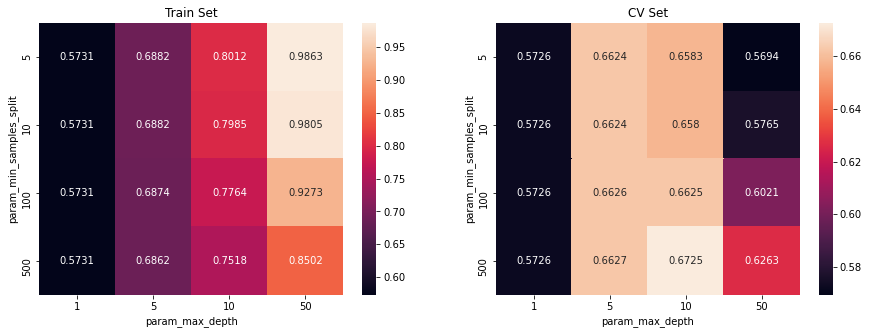

In [ ]:
max_Scores = pd.DataFrame(GRD_CV_Classifier.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(max_Scores.mean_train_score, annot = True, fmt = '.4g', ax = ax[0])
sns.heatmap(max_Scores.mean_test_score, annot = True, fmt = '.4g', ax = ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

## <font color='blue'>>> Train model using the best hyperparameter</font>

In [ ]:
def Predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t, 3))
    predictions = []
    global predictions1
    for i in proba:
        if i >= t:
            predictions.append(1)
        else:
            predictions.append(0)
    predictions1 = predictions
    return predictions

In [ ]:
def batch_predict(clf, data):
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0] % 1000
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:, 1])
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:, 1])
    
    return y_data_pred

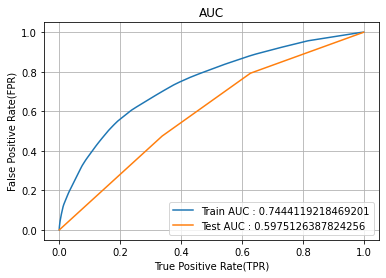

In [ ]:
DT_Classifier2 = DecisionTreeClassifier(max_depth = 10, min_samples_split = 500)
DT_Classifier3 = DecisionTreeClassifier(max_depth = 2, min_samples_split = 500)

DT_Classifier2.fit(TFIDF_train_new, y_train)
DT_Classifier3.fit(TFIDF_train_new, y_train)

y_train_pred = batch_predict(GRD_CV_Classifier, TFIDF_train_new)    
y_test_pred = batch_predict(DT_Classifier3, TFIDF_test_new)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = "Train AUC : " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC : " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## <font color='blue'>>> Confusion Matrix : TFIDF_train_new , TFIDF_test_new

the maximum value of tpr*(1-fpr) 0.4656323326516046 for threshold 0.475
the maximum value of tpr*(1-fpr) 0.3143611897373016 for threshold 0.908


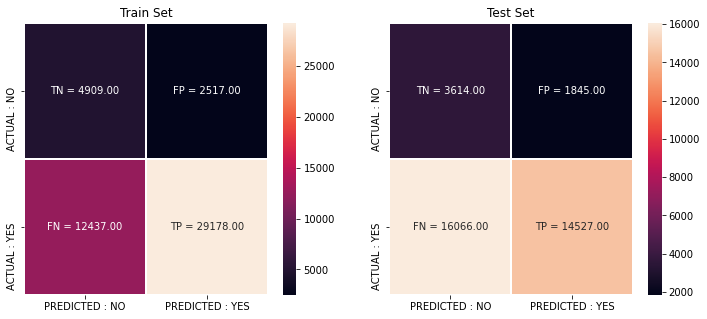

In [ ]:
# https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn

conf_mat_train = confusion_matrix(y_train, Predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
conf_mat_test = confusion_matrix(y_test, Predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1,2, figsize = (12,5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_mat_train.flatten())])).reshape(2,2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_mat_test.flatten())])).reshape(2,2)

sns.heatmap(conf_mat_train, linewidths =.5, xticklabels = ['PREDICTED : NO', 'PREDICTED : YES'], yticklabels = ['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax = ax[0])
sns.heatmap(conf_mat_test, linewidths =.5, xticklabels = ['PREDICTED : NO', 'PREDICTED : YES'], yticklabels = ['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax = ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## <font color='blue'>>> False Possitive Points</font>

In [ ]:
# https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
# https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb

false_positive_index = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (y_test_pred[i] <= 0.9) :
        false_positive_index.append(i)

folse_positive_essay = []
for i in false_positive_index :
    folse_positive_essay.append(X_test["essay"].values[i])


## <font color='blue'>>> Ploting the WordCloud with the words of essay text of these 'false positive data points'</font>

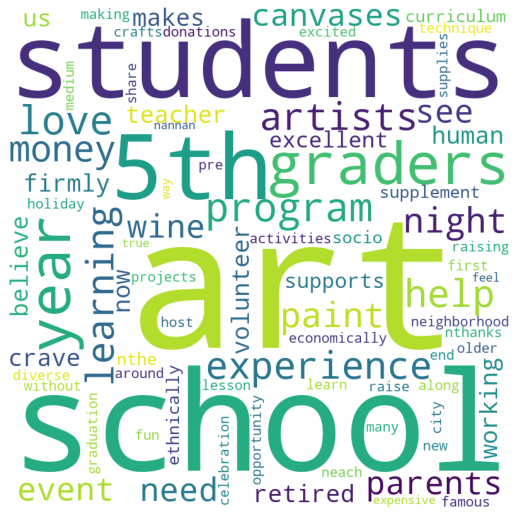

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in folse_positive_essay :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## <font color='blue'> Ploting Box plot with 'price' of false possitive points</font>

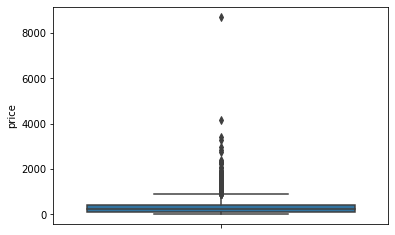

In [ ]:
cols = X_test.columns
X_test_false_Positive = pd.DataFrame(columns = cols)

for i in false_positive_index : 
    X_test_false_Positive = X_test_false_Positive.append(X_test.filter(items = [i], axis = 0))

len(X_test_false_Positive)
sns.boxplot(y = 'price', data = X_test_false_Positive)

## <font color='blue'>>> PDF with 'teacher_number_of_previously_posted_projects' false possitive points</font>

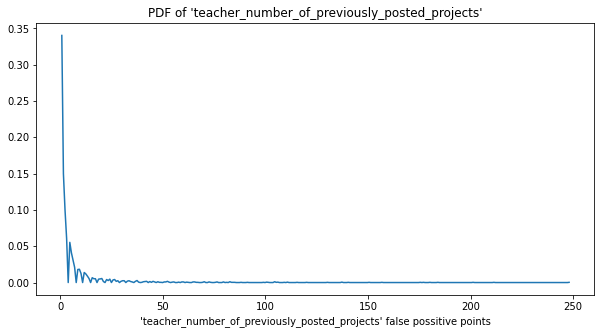

In [ ]:
plt.figure(figsize = (10, 5))
counts, bin_edges = np.histogram(X_test_false_Positive['teacher_number_of_previously_posted_projects'],
bins = 'auto', density = True)
pdf = counts / sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.title("PDF of 'teacher_number_of_previously_posted_projects'")
plt.xlabel("'teacher_number_of_previously_posted_projects' false possitive points")
plt.show()


# <b><font color='red'>Task 2 :</font></b>

## <b><font color='blue'>>> Applying Decision Trees on TFIDF W2V, </font><font color='red'> SET 2</font></b>

In [ ]:
from sklearn.feature_selection import VarianceThreshold

TFIDFW2V_train_new = hstack((train_categories_one_hot, train_subcategories_one_hot, train_state_one_hot, train_grade_one_hot, train_teacher_prefix_one_hot,
                             tfidf_w2v_essay_train_data, tfidf_w2v_project_title_train_data, train_quantity_standard, train_prev_proj_standard,
                             train_price_standard, train_title_word_count_standard, train_essay_word_count_standard, train_positive_standard,
                             train_negitive_standard, train_neutral_standard)).tocsr()

TFIDFW2V_CV_new = hstack((cv_categories_one_hot, cv_subcategories_one_hot, cv_state_one_hot, cv_grade_one_hot, cv_teacher_prefix_one_hot, tfidf_w2v_essay_cv_data,
                        tfidf_w2v_project_title_cv_data, cv_quantity_standard, cv_prev_proj_standard, cv_price_standard, cv_title_word_count_standard,
                        cv_essay_word_count_standard, cv_positive_standard, cv_negitive_standard, cv_neutral_standard)).tocsr()

TFIDFW2V_test_new = hstack((test_categories_one_hot, test_subcategories_one_hot, test_state_one_hot, test_grade_one_hot, test_teacher_prefix_one_hot, 
                        tfidf_w2v_essay_test_data, tfidf_w2v_project_title_test_data, test_quantity_standard, test_prev_proj_standard,
                        test_price_standard, test_title_word_count_standard, test_essay_word_count_standard, test_positive_standard,
                        test_negitive_standard, test_neutral_standard)).tocsr()

In [ ]:
print(TFIDFW2V_train_new.shape)
print(TFIDFW2V_CV_new.shape)
print(TFIDFW2V_test_new.shape)

(49041, 707)
(24155, 707)
(36052, 707)


## <font color='blue'>>> Hyperparameter Tuning to find best estimator using GridSearchCV</font>

In [ ]:
DT_Classifier4 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
DT_Classifier4.fit(TFIDFW2V_train_new, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
# https://datascience.stackexchange.com/questions/6683/feature-selection-using-feature-importances-in-random-forests-with-scikit-learn
def Importance_Features(model, X):
     return X[:, model.feature_importances_ > 0.0]

In [ ]:
TFIDFW2V_train_Importance = Importance_Features(DT_Classifier4, TFIDFW2V_train_new)
TFIDFW2V_test_Importance = Importance_Features(DT_Classifier4, TFIDFW2V_test_new)
TFIDFW2V_CV_Importance = Importance_Features(DT_Classifier4, TFIDFW2V_CV_new)

In [ ]:
print(TFIDFW2V_train_Importance.shape)
print(TFIDFW2V_test_Importance.shape)
print(TFIDFW2V_CV_Importance.shape)

(49041, 659)
(36052, 659)
(24155, 659)


## <font color='blue'>>> Hyperparameter Tuning to find best estimator using GridSearchCV :</font>

In [ ]:
DT_Classifier5 = DecisionTreeClassifier(class_weight = 'balanced', random_state = 10)
param = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10, 100, 500]}
GRD_CV_Classifier1 = GridSearchCV(DT_Classifier5, param, cv = 3, scoring = 'roc_auc', return_train_score = True, verbose = 1, n_jobs = -1)
GRD_CV_Classifier1.fit(TFIDFW2V_train_Importance, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 23.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_

In [ ]:
print('Best Tuned Parameter :')
print(GRD_CV_Classifier1.best_estimator_)

Best Tuned Parameter :
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')


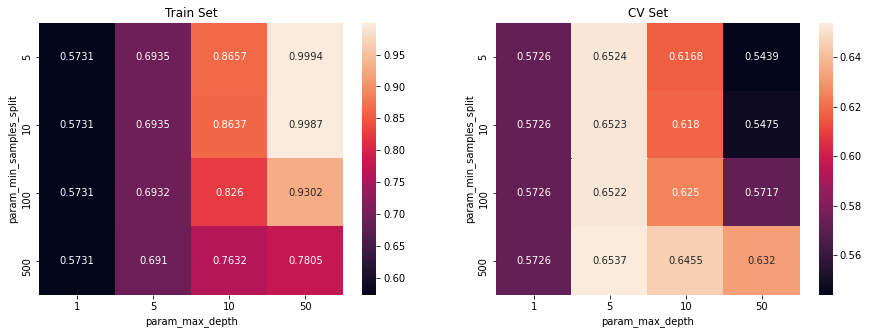

In [ ]:
max_Scores = pd.DataFrame(GRD_CV_Classifier1.cv_results_).groupby(['param_min_samples_split', 'param_max_depth']).max().unstack()[['mean_test_score', 'mean_train_score']]
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.heatmap(max_Scores.mean_train_score, annot = True, fmt = '.4g', ax = ax[0])
sns.heatmap(max_Scores.mean_test_score, annot = True, fmt = '.4g', ax = ax[1])
ax[0].set_title('Train Set')
ax[1].set_title('CV Set')
plt.show()

## <font color='blue'>>> Train model using the best hyperparameter</font>

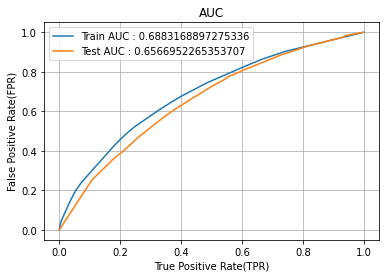

In [ ]:
DT_Classifier5 = DecisionTreeClassifier(max_depth = 5, min_samples_split = 500)
DT_Classifier6 = DecisionTreeClassifier(max_depth = 2, min_samples_split = 500)

DT_Classifier5.fit(TFIDFW2V_train_Importance, y_train)
DT_Classifier6.fit(TFIDFW2V_train_Importance, y_train)

y_train_pred = batch_predict(GRD_CV_Classifier1, TFIDFW2V_train_Importance)    
y_test_pred = batch_predict(DT_Classifier5, TFIDFW2V_test_Importance)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label = "Train AUC : " + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label = "Test AUC : " + str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

## <font color='blue'>>> Confusion Matrix : TFIDF_train_new , TFIDF_test_new

the maximum value of tpr*(1-fpr) 0.4084685748275613 for threshold 0.495
the maximum value of tpr*(1-fpr) 0.3783550524684905 for threshold 0.883


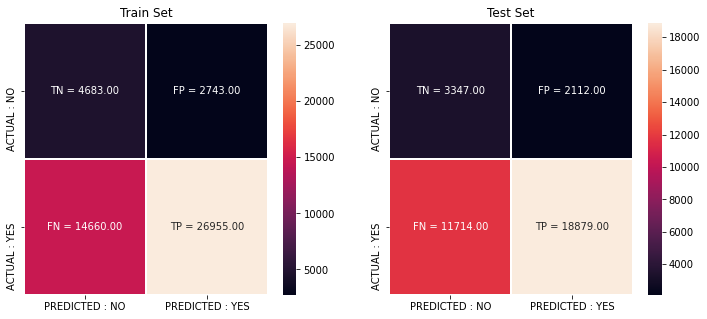

In [ ]:
# https://www.quantinsti.com/blog/creating-heatmap-using-python-seaborn

conf_mat_train = confusion_matrix(y_train, Predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
conf_mat_test = confusion_matrix(y_test, Predict(y_test_pred, te_thresholds, test_fpr, test_tpr))

key = (np.asarray([['TN','FP'], ['FN', 'TP']]))
fig, ax = plt.subplots(1, 2, figsize = (12, 5)) 

labels_train = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_mat_train.flatten())])).reshape(2, 2)
labels_test = (np.asarray(["{0} = {1:.2f}" .format(key, value) for key, value in zip(key.flatten(), conf_mat_test.flatten())])).reshape(2, 2)

sns.heatmap(conf_mat_train, linewidths =.5, xticklabels = ['PREDICTED : NO', 'PREDICTED : YES'], yticklabels = ['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_train, fmt = '', ax = ax[0])
sns.heatmap(conf_mat_test, linewidths =.5, xticklabels = ['PREDICTED : NO', 'PREDICTED : YES'], yticklabels = ['ACTUAL : NO', 'ACTUAL : YES'], annot = labels_test, fmt = '', ax = ax[1])

ax[0].set_title('Train Set')
ax[1].set_title('Test Set')

plt.show()

## <font color='blue'>>> False Possitive Points</font>

In [ ]:
# https://www.google.com/search?q=geeks+for+geeks+false+positive&rlz=1C1SQJL_enIN849IN849&oq=geeks+for+geeks+false+positive&aqs=chrome..69i57j33l5.6431j0j7&sourceid=chrome&ie=UTF-8
# https://github.com/pskadasi/DecisionTrees_DonorsChoose/blob/master/Copy_of_8_DonorsChoose_DT_(1).ipynb

false_positive_index_TFIDFW2V = []
for i in range(len(y_test)) :
    if (y_test.values[i] == 0) & (y_test_pred[i] <= 0.9) :
        false_positive_index_TFIDFW2V.append(i)

folse_positive_essay_TFIDFW2V = []
for i in false_positive_index_TFIDFW2V :
    folse_positive_essay_TFIDFW2V.append(X_test["essay"].values[i])

## <font color='blue'>>> Ploting the WordCloud with the words of essay text of these 'false positive data points'</font>

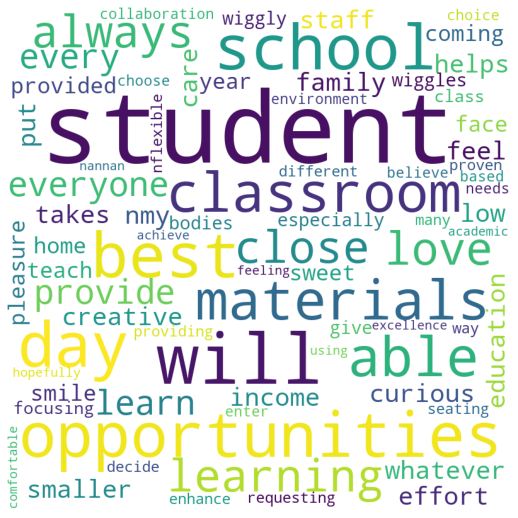

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ' '
stopwords = set(STOPWORDS)
for val in folse_positive_essay_TFIDFW2V :
    val = str(val)
    tokens = val.split()
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## <font color='blue'> Ploting Box plot with 'price' of false possitive points</font>

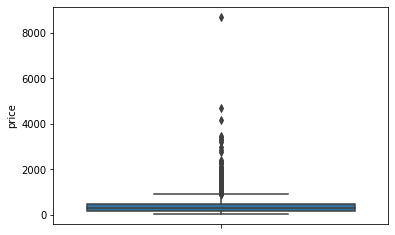

In [ ]:
Cols = X_test.columns
X_test_false_Positive_TFIDFW2V = pd.DataFrame(columns = Cols)

for i in false_positive_index_TFIDFW2V : 
    X_test_false_Positive_TFIDFW2V = X_test_false_Positive_TFIDFW2V.append(X_test.filter(items = [i], axis = 0))

len(X_test_false_Positive_TFIDFW2V)
sns.boxplot(y = 'price', data = X_test_false_Positive_TFIDFW2V)

## <font color='blue'>>> PDF with 'teacher_number_of_previously_posted_projects' false possitive points</font>

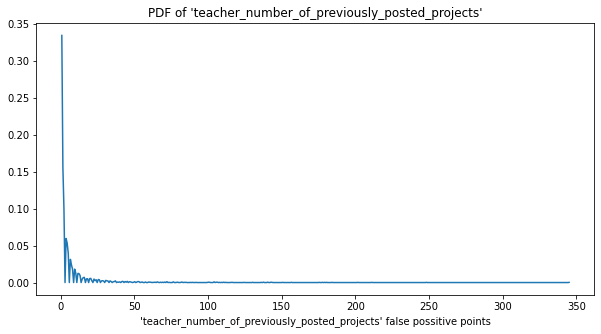

In [ ]:
plt.figure(figsize = (10, 5))
counts, bin_edges = np.histogram(X_test_false_Positive_TFIDFW2V['teacher_number_of_previously_posted_projects'],
bins = 'auto', density = True)
pdf = counts / sum(counts)
plt.plot(bin_edges[1:], pdf)
plt.title("PDF of 'teacher_number_of_previously_posted_projects'")
plt.xlabel("'teacher_number_of_previously_posted_projects' false possitive points")
plt.show()

In [113]:
# http://zetcode.com/python/prettytable/

p = PrettyTable()
p.field_names = ["Vectorizer", "Model", "Best_param_max_depth", "Best_param_min_samples_split" , "Train AUC", "Test AUC"]
p.add_row(["TFIDF-set2", "DT", 10, 500, 0.74, 0.59])
p.add_row(["Removing Non-Zero important features TFIDF(set2)", "DT", 5, 500, 0.68, 0.65])

print(p)


+--------------------------------------------------+-------+----------------------+------------------------------+-----------+----------+
|                    Vectorizer                    | Model | Best_param_max_depth | Best_param_min_samples_split | Train AUC | Test AUC |
+--------------------------------------------------+-------+----------------------+------------------------------+-----------+----------+
|                    TFIDF-set2                    |   DT  |          10          |             500              |    0.74   |   0.59   |
| Removing Non-Zero important features TFIDF(set2) |   DT  |          5           |             500              |    0.68   |   0.65   |
+--------------------------------------------------+-------+----------------------+------------------------------+-----------+----------+
